Model Training

1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [6]:
df = pd.read_csv(r"F:\7days_MLproject\Notebook\Data\concrete_data.csv")

In [8]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2020)
x_train.shape,x_test.shape

((721, 8), (309, 8))

Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

In [17]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.4620
- Mean Absolute Error: 8.2962
- R2 Score: 0.6171
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1608
- Mean Absolute Error: 8.2298
- R2 Score: 0.6065


Lasso
Model performance for Training set
- Root Mean Squared Error: 10.4650
- Mean Absolute Error: 8.2993
- R2 Score: 0.6168
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1793
- Mean Absolute Error: 8.2477
- R2 Score: 0.6051


Ridge
Model performance for Training set
- Root Mean Squared Error: 10.4620
- Mean Absolute Error: 8.2962
- R2 Score: 0.6171
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1608
- Mean Absolute Error: 8.2298
- R2 Score: 0.6065


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.5455
- Mean Absolute Error: 5.6728
- R2 Score: 0.8008
-----------------

Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.928431
6,XGBRegressor,0.893618
5,Random Forest Regressor,0.878674
8,AdaBoost Regressor,0.798231
4,Decision Tree,0.747001
3,K-Neighbors Regressor,0.643127
0,Linear Regression,0.606521
2,Ridge,0.606521
1,Lasso,0.605084


XGBRegressor

In [21]:
xgb_model = XGBRegressor()
xgb_model = xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 89.36


Plot y_test and y_pred

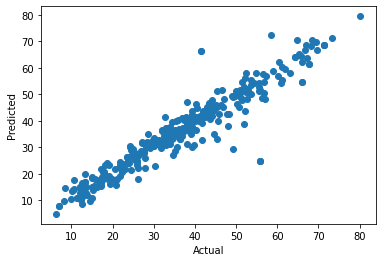

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

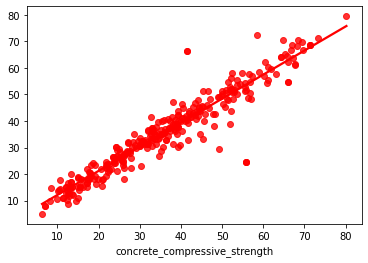

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between actual and predicted values

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
258,42.92,45.225117,-2.305117
876,33.06,32.666061,0.393939
286,27.77,22.296730,5.473270
924,26.97,28.824162,-1.854162
106,55.90,24.705299,31.194701
...,...,...,...
340,36.99,40.911407,-3.921407
861,37.26,40.157959,-2.897959
612,25.97,24.594818,1.375182
324,21.78,23.422308,-1.642308
